<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/RandomForestClassifier/random_forest_classifier_melb_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>'Price': Giá nhà, ví dụ: 0 (Bé hơn giá trung bình), 1 (Lớn hơn giá trung bình)
<br>
Với đề tài của em là quyết định loại nhà, em có thể chọn các biến phụ thuộc sau:
<br>
1. 'Rooms': Số lượng phòng ngủ trong nhà.
<br>
2. 'Distance': Khoảng cách từ nhà đến trung tâm thành phố hoặc điểm quan trọng gần nhất.
<br>
3. 'Bathroom': Số lượng phòng tắm trong nhà.
<br>
4. 'Car': Số lượng chỗ đậu xe trong nhà.
<br>
5. 'Landsize': Diện tích đất.
<br>
6. 'BuildingArea': Diện tích xây dựng của nhà.
<br>
7. 'YearBuilt': Năm xây dựng nhà.
<br>
8. 'Regionname': Tên khu vực của nhà.
</h3>

Import libraries 


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


Tính trung bình cộng price 

In [ ]:
# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('melb_data1.csv')

# Tính trung bình cộng giá
average_price = df['Price'].mean()

print(f"Trung bình cộng giá: {average_price}")

Trung bình cộng giá: 1075684.079455081


Mã hóa bộ dữ liệu với giá bé hơn trung bình là 0 và lớn hơn là 1

In [ ]:
def encode_price(value):
    if value < average_price:
        return 0
    else:
        return 1

# Áp dụng hàm mã hóa lên cột Price
df['Encoded_Price'] = df['Price'].apply(encode_price)

print(df)

               Suburb            Address  Rooms Type    Price        SellerG  \
0        Airport West      154 Halsey Rd      3    t   840000         Nelson   
1         Albert Park     105 Kerferd Rd      2    h  1275000  hockingstuart   
2         Albert Park   85 Richardson St      2    h  1455000        Thomson   
3          Alphington         6 Smith St      4    h  2000000          Brace   
4          Alphington    5/6 Yarralea St      3    h  1110000         Jellis   
...               ...                ...    ...  ...      ...            ...   
13575  West Footscray    32 Richelieu St      5    h  1030000        Village   
13576  West Footscray     121 Suffolk St      3    h   878000        Village   
13577          Albion       3 Barclay St      2    h   460000          Barry   
13578          Albion     5/25 Ridley St      2    u   190000        Burnham   
13579        Oakleigh  9/126 Atherton Rd      3    u   665000        O'Brien   

             Date  Distance  Postcode  

In [ ]:
import warnings

warnings.filterwarnings('ignore')

Import dataset


In [ ]:
df

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Encoded_Price
0,Airport West,154 Halsey Rd,3,t,840000,Nelson,3/9/2016,13.5,3042,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464,0
1,Albert Park,105 Kerferd Rd,2,h,1275000,hockingstuart,3/9/2016,3.3,3206,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280,1
2,Albert Park,85 Richardson St,2,h,1455000,Thomson,3/9/2016,3.3,3206,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280,1
3,Alphington,6 Smith St,4,h,2000000,Brace,3/9/2016,6.4,3078,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211,1
4,Alphington,5/6 Yarralea St,3,h,1110000,Jellis,3/9/2016,6.4,3078,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,West Footscray,32 Richelieu St,5,h,1030000,Village,30/07/2016,8.2,3012,2,2.0,352,NaN,NaN,Maribyrnong,-37.7908,144.8711,Western Metropolitan,5058,0
13576,West Footscray,121 Suffolk St,3,h,878000,Village,30/07/2016,8.2,3012,1,1.0,397,127.0,1960.0,Maribyrnong,-37.7901,144.8682,Western Metropolitan,5058,0
13577,Albion,3 Barclay St,2,h,460000,Barry,30/07/2016,13.9,3020,1,2.0,463,85.0,NaN,Brimbank,-37.7813,144.8234,Western Metropolitan,2185,0
13578,Albion,5/25 Ridley St,2,u,190000,Burnham,30/07/2016,13.9,3020,1,1.0,0,NaN,NaN,Brimbank,-37.7839,144.8239,Western Metropolitan,2185,0


Phân tích dữ liệu

In [ ]:
df.shape

(13580, 20)

Chúng ta có thể thấy rằng có 13580 trường hợp và 20 biến trong tập dữ liệu.

In [ ]:
# Tính ma trận tương quan giữa các thuộc tính
correlation_matrix = df.corr()

# Sắp xếp theo độ tương quan với cột 'Price' giảm dần
correlation_with_price = correlation_matrix['Price'].abs().sort_values(ascending=False)
print(correlation_with_price)



Price            1.000000
Encoded_Price    0.744073
Rooms            0.496634
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64


Cắt những dữ liệu cần thiết
'Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt'

In [ ]:
selected_columns = ['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Encoded_Price', 'Regionname', 'Price']
df = df[selected_columns]

In [ ]:
df.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Encoded_Price,Regionname,Price
0,t,3,13.5,2,1.0,303,225.0,2016.0,0,Western Metropolitan,840000
1,h,2,3.3,1,0.0,120,82.0,1900.0,1,Southern Metropolitan,1275000
2,h,2,3.3,1,0.0,159,NaN,NaN,1,Southern Metropolitan,1455000
3,h,4,6.4,2,4.0,853,263.0,1930.0,1,Northern Metropolitan,2000000
4,h,3,6.4,2,2.0,208,NaN,2013.0,1,Northern Metropolitan,1110000


In [ ]:
df_dropna=df.dropna()
df = df_dropna.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6830 non-null   object 
 1   Rooms          6830 non-null   int64  
 2   Distance       6830 non-null   float64
 3   Bathroom       6830 non-null   int64  
 4   Car            6830 non-null   float64
 5   Landsize       6830 non-null   int64  
 6   BuildingArea   6830 non-null   float64
 7   YearBuilt      6830 non-null   float64
 8   Encoded_Price  6830 non-null   int64  
 9   Regionname     6830 non-null   object 
 10  Price          6830 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 587.1+ KB


In [ ]:
df.to_csv('export_melb_data.csv', index=False)

In [ ]:
selected_columns = ['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Encoded_Price', 'Regionname']
df = df[selected_columns]

Xem tóm tắt tập dữ liệu

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6830 non-null   object 
 1   Rooms          6830 non-null   int64  
 2   Distance       6830 non-null   float64
 3   Bathroom       6830 non-null   int64  
 4   Car            6830 non-null   float64
 5   Landsize       6830 non-null   int64  
 6   BuildingArea   6830 non-null   float64
 7   YearBuilt      6830 non-null   float64
 8   Encoded_Price  6830 non-null   int64  
 9   Regionname     6830 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 533.7+ KB


In [ ]:
df_dropna=df.dropna()
df = df_dropna.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6830 non-null   object 
 1   Rooms          6830 non-null   int64  
 2   Distance       6830 non-null   float64
 3   Bathroom       6830 non-null   int64  
 4   Car            6830 non-null   float64
 5   Landsize       6830 non-null   int64  
 6   BuildingArea   6830 non-null   float64
 7   YearBuilt      6830 non-null   float64
 8   Encoded_Price  6830 non-null   int64  
 9   Regionname     6830 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 533.7+ KB


Phân phối tần số của các giá trị trong các biến


In [ ]:
col_names = ['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Encoded_Price', 'Regionname']


for col in col_names:
    
    print(df[col].value_counts())   

h    4660
u    1528
t     642
Name: Type, dtype: int64
3    2840
2    1784
4    1498
1     334
5     331
6      33
7       6
8       4
Name: Rooms, dtype: int64
11.2    362
9.2     185
7.8     180
13.9    160
5.2     145
       ... 
47.4      1
27.1      1
23.3      1
3.7       1
35.5      1
Name: Distance, Length: 197, dtype: int64
1    3524
2    2678
3     535
4      70
5      18
6       3
7       1
8       1
Name: Bathroom, dtype: int64
1.0     2885
2.0     2811
0.0      458
3.0      361
4.0      246
5.0       33
6.0       26
7.0        5
10.0       2
8.0        2
9.0        1
Name: Car, dtype: int64
0       1015
650       36
697       33
700       25
585       23
        ... 
3093       1
1317       1
3957       1
1262       1
1659       1
Name: Landsize, Length: 1161, dtype: int64
120.00    107
110.00     87
100.00     83
130.00     80
115.00     73
         ... 
113.76      1
107.40      1
255.79      1
186.36      1
357.00      1
Name: BuildingArea, Length: 560, dtype: int64
197

Có 9 biến trong tập dữ liệu. Tất cả các biến thuộc loại dữ liệu phân loại.


Khám phá biến Type

In [ ]:
df['Encoded_Price'].value_counts()

0    4246
1    2584
Name: Encoded_Price, dtype: int64

In [ ]:
# check missing values in variables

df.isnull().sum()

Type             0
Rooms            0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Encoded_Price    0
Regionname       0
dtype: int64

Chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong tập dữ liệu. Tôi đã kiểm tra phân phối tần suất của các giá trị trước đó. Nó cũng xác nhận rằng không có giá trị nào bị thiếu trong tập dữ liệu.

Khai báo vector đặc trưng và biến mục tiêu

In [ ]:
X = df.drop(['Encoded_Price'], axis=1)
y = df['Encoded_Price']

Tách dữ liệu thành tập huấn luyện và kiểm tra riêng biệt

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4576, 9), (2254, 9))

**Feature Engineering**

In [ ]:
# check data types in X_train

X_train.dtypes

Type             object
Rooms             int64
Distance        float64
Bathroom          int64
Car             float64
Landsize          int64
BuildingArea    float64
YearBuilt       float64
Regionname       object
dtype: object

Mã hóa các biến phân loại

Bây giờ, tôi sẽ mã hóa các biến phân loại.

In [ ]:
X_train.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
5447,h,4,6.5,2,0.0,387,152.0,1900.0,Northern Metropolitan
4813,h,2,11.2,1,2.0,411,165.0,1910.0,Southern Metropolitan
219,h,5,11.2,2,2.0,567,327.0,1915.0,Southern Metropolitan
1288,h,3,9.2,1,2.0,307,96.0,1950.0,Northern Metropolitan
582,h,2,6.4,1,0.0,215,98.0,1910.0,Western Metropolitan


In [ ]:
# import category encoders
!pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Type','Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt', 'Regionname'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
5447,1,1,1,1,1,1,1,1,1
4813,1,2,2,2,2,2,2,2,2
219,1,3,2,1,2,3,3,3,2
1288,1,4,3,2,2,4,4,4,1
582,1,2,4,2,1,5,5,2,3


In [ ]:
X_test.head()

,Type,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
4716,3,4,183.0,2.0,2.0,645.0,32.0,49.0,7
2098,1,2,57.0,2.0,2.0,293.0,207.0,24.0,3
4609,1,4,56.0,1.0,2.0,606.0,9.0,16.0,5
4700,2,4,56.0,1.0,2.0,581.0,182.0,7.0,2
4359,3,4,87.0,1.0,2.0,11.0,17.0,18.0,2


Bây giờ chúng tôi đã có bộ đào tạo và thử nghiệm sẵn sàng để xây dựng mô hình.

**Mô hình phân loại rừng ngẫu nhiên với các tham số mặc định**

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8327


Ở đây, y_test là nhãn lớp thực và y_pred là nhãn lớp dự đoán trong tập kiểm tra.

mã liên kết

Ở đây, tôi đã xây dựng mô hình Random Forest Classifier với tham số mặc định là n_estimators = 10. Vì vậy, tôi đã sử dụng 10 cây quyết định để xây dựng mô hình. Bây giờ, tôi sẽ tăng số lượng cây quyết định và xem ảnh hưởng của nó đối với độ chính xác.

**Random Forest Classifier model with parameter n_estimators=100**

In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8327


Điểm chính xác của mô hình với 10 cây quyết định là 0,8194 nhưng tương tự với 100 cây quyết định là 0,8194. Vì vậy, độ chính xác dự kiến ​​sẽ tăng theo số lượng cây quyết định trong mô hình.

**Các tính năng quan trọng với mô hình Random Forest**

Cho đến bây giờ, tôi đã sử dụng tất cả các tính năng được đưa ra trong mô hình. Bây giờ, tôi sẽ chỉ chọn các tính năng quan trọng, xây dựng mô hình bằng cách sử dụng các tính năng này và xem ảnh hưởng của nó đối với độ chính xác.

Đầu tiên mình sẽ tạo mô hình Random Forest như sau:-

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Regionname      0.158801
Distance        0.151841
Landsize        0.131618
BuildingArea    0.125717
YearBuilt       0.122769
Type            0.114856
Bathroom        0.078535
Rooms           0.073785
Car             0.042077
dtype: float64

Chúng ta có thể thấy rằng tính năng quan trọng nhất là safety và tính năng ít quan trọng nhất là Bathroom.

**Trực quan hóa điểm số của các tính năng**

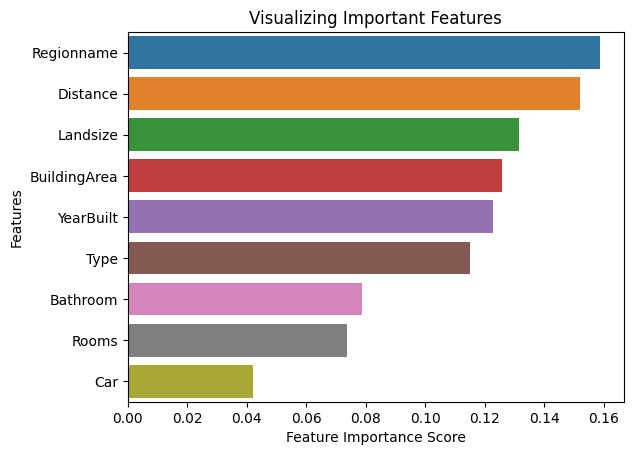

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

**Xây dựng mô hình Rừng ngẫu nhiên trên các tính năng đã chọn**

Bây giờ, tôi sẽ loại bỏ các cửa tính năng ít quan trọng nhất khỏi mô hình, xây dựng lại mô hình và kiểm tra ảnh hưởng của nó đối với độ chính xác.

In [ ]:
# declare feature vector and target variable

X = df.drop(['Encoded_Price', 'Car'], axis=1)

y = df['Encoded_Price']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Bây giờ, em sẽ xây dựng mô hình rừng ngẫu nhiên và kiểm tra độ chính xác.

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Type','Rooms','Distance','Bathroom','Landsize','BuildingArea','YearBuilt', 'Regionname'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with Bathroom variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Bathroom variable removed : 0.8345


Em đã loại bỏ biến "Car" khỏi mô hình, xây dựng lại và kiểm tra độ chính xác của nó. Độ chính xác của mô hình sau khi loại bỏ biến "Car" là .... Độ chính xác của mô hình khi tính đến tất cả các biến là ..... Vì vậy, chúng ta có thể thấy rằng độ chính xác của mô hình đã được cải thiện khi loại bỏ biến "Bathroom" khỏi mô hình.

Dựa trên phân tích trên, chúng ta có thể kết luận rằng độ chính xác của mô hình phân loại của chúng ta rất tốt. Mô hình của chúng ta đang làm rất tốt trong việc dự đoán nhãn lớp.

Tuy nhiên, mô hình không cung cấp phân phối giá trị bên trong. Ngoài ra, nó không cho biết về loại lỗi mà bộ phân loại của chúng ta đang gặp phải.

Chúng ta có một công cụ khác gọi là **Confusion matrix** giúp chúng ta giải quyết vấn đề này.

**Confusion matrix**


Ma trận nhầm lẫn (confusion matrix) là một công cụ để tổng hợp hiệu suất của một thuật toán phân loại. Ma trận nhầm lẫn cung cấp cho chúng ta một cái nhìn rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi mà mô hình tạo ra. Nó cung cấp cho chúng ta một tóm tắt về các dự đoán đúng và sai lệch phân loại theo từng nhãn.

Có bốn loại kết quả có thể xảy ra trong quá trình đánh giá hiệu suất của một mô hình phân loại. Bốn loại kết quả này được mô tả như sau:

True Positives (TP) - True Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định và quan sát thực tế thuộc về lớp đó.

True Negatives (TN) - True Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định và quan sát thực tế cũng không thuộc về lớp đó.

False Positives (FP) - False Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định nhưng quan sát thực tế không thuộc về lớp đó. Loại lỗi này được gọi là lỗi Loại I.

False Negatives (FN) - False Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định nhưng quan sát thực tế thuộc về lớp đó. Đây là một loại lỗi rất nghiêm trọng và được gọi là lỗi Loại II.

Bốn kết quả này được tổng hợp trong một ma trận nhầm lẫn như dưới đây.

In [ ]:
# declare feature vector and target variable

X = df.drop(['Encoded_Price', 'Car', 'Distance'], axis=1)

y = df['Encoded_Price']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Type','Rooms','Bathroom','Landsize','BuildingArea','YearBuilt', 'Regionname'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with Bathroom variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Bathroom variable removed : 0.8092


Nhận thấy, khi bỏ Distance (Một biến có độ ảnh hưởng quyết định giá nhà đứng thứ 2) thì ta thấy độ chính xác giảm xuống đáng kể, điều đó cho thấy, Distance là một biến có độ ảnh hưởng lớn là đúng. Suy ra thuật toán có độ chuẩn xác cao.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1206  187]
 [ 243  618]]


**Classification Report**

Báo cáo phân loại là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị điểm chính xác, thu hồi, f1 và hỗ trợ cho mô hình. Tôi đã mô tả các thuật ngữ này sau.

Chúng tôi có thể in một báo cáo phân loại như sau: -

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1393
           1       0.77      0.72      0.74       861

    accuracy                           0.81      2254
   macro avg       0.80      0.79      0.80      2254
weighted avg       0.81      0.81      0.81      2254



**Kết quả và kết luận**

Trong dự án này, em đã sử dụng thuật toán Rừng ngẫu nhiên để xây dựng bộ phân loại dự đoán loại nhà. Em đã xây dựng hai mô hình, một với 10 cây quyết định và một với 100 cây quyết định.

Độ chính xác của mô hình với 10 cây quyết định là ..., trong khi độ chính xác của mô hình với 100 cây quyết định là .... Do đó, dự kiến độ chính xác sẽ tăng theo số lượng cây quyết định trong mô hình.

Em đã sử dụng mô hình Rừng ngẫu nhiên để xác định các tính năng quan trọng, xây dựng mô hình bằng cách sử dụng những tính năng này và xem xét ảnh hưởng của chúng đối với độ chính xác. Tính năng quan trọng nhất là tính năng an toàn và tính năng ít quan trọng nhất là YearBuilt (Năm xây dựng).

Em đã loại bỏ biến số phòng tắm ra khỏi mô hình, xây dựng lại và kiểm tra độ chính xác của nó. Độ chính xác của mô hình khi loại bỏ biến số phòng tắm là .... Độ chính xác của mô hình với tất cả các biến được tính đến là .... Do đó, ta thấy rằng độ chính xác của mô hình đã được cải thiện khi loại bỏ biến số phòng tắm ra khỏi mô hình.

Tuy nhiên, nếu bạn loại bỏ tính năng năm xây dựng khỏi mô hình và xây dựng lại, độ chính xác giảm đáng kể xuống còn .... Vì vậy, bạn quyết định giữ tính năng này trong mô hình.

Để có cái nhìn rõ hơn về hiệu suất của mô hình phân loại, em sử dụng ma trận nhầm lẫn và báo cáo phân loại. Chúng giúp trực quan hóa hiệu suất của mô hình và phân tích các loại lỗi mà mô hình tạo ra.